## Dependencies

In [124]:
# System dependencies
from os import listdir
#import time as clock
#from IPython.display import clear_output

In [125]:
# Data Management
import pickle
#import datetime as dt

In [126]:
# Data manipulation dependencies
#import math
import statistics
import scipy.stats
#import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# Custom data handling methods
import prep_IO

In [128]:
# Directory of pre-determined lustre failed jobs
src = './lustre_fail_set.pkl'

## Data

1. Size
2. Missingness
3. Shape
4. Central Tendency
5. Variability

- first level keys: search labels
- second level keys: ['Acct Info', 'Host Info', 'Source Files']
- 'Host Info' keys: ['Timely Data', 'Schemas', 'Specs']


In [129]:
# read in search_out from saved dict in src_file
search_out = pickle.load( open( src, "rb" ) )
keys = list(search_out.keys())
len(keys)

53

In [130]:
keys[0]

('comet-14-72', 1589361098, 1589371654, '33301074')

In [131]:
search_out[ keys[0] ]['Host Info']['Timely Data']

[('block', 'io_ticks(U=ms)', 'md0', 0, '2017-04-04T16:37:31'),
 ('block', 'io_ticks(U=ms)', 'md1', 0, '2017-04-04T16:37:31'),
 ('block', 'io_ticks(U=ms)', 'sda', 47379147, '2017-04-04T16:37:31'),
 ('block', 'io_ticks(U=ms)', 'sdb', 47371705, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs)', '22', 0, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs)', '20', 0, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs)', '21', 0, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs)', '11', 3, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs)', '10', 0, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs)', '13', 0, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs)', '12', 24, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs)', '15', 0, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs)', '14', 0, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs)', '17', 0, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs)', '16', 0, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs)', '19', 0, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs)', '18', 0, '2017-04-04T16:37:31'),
 ('cpu', 'irq(U=cs

## Temp A

In [158]:
def get_stats( data ):         
    stats = {
        'Count' : len(data),
        'Min' : min(data),
        'Max' : max(data),
        'Mode' : statistics.mode(data),
        'Quartiles' : np.percentile(data, [25, 50, 75] ),
        'Mean' : np.mean(data),
        'Std. Dev' : np.std(data),
        'Skew' : scipy.stats.skew(data)
    }
    return stats

def get_cov_matrix( x_list, y_list ):
    x_arr,y_arr = np.array( x_list ), np.array( y_list )
    
    return np.cov( x_arr, y_arr )

def get_corr_matrix( x_list, y_list ):
    x_arr,y_arr = np.array( x_list ), np.array( y_list )
    
    return np.corrcoef( x_arr, y_arr ) #r = corrcoef_matrix[0, 1]

def corr_w_pval( x_list, y_list ):
    x_arr,y_arr = np.array( x_list ), np.array( y_list )

    return scipy.stats.pearsonr( x_arr, y_arr )

def linear_reg( x_list, y_list ):
    x_arr,y_arr = np.array( x_list ), np.array( y_list )

    #LinregressResult has .slope, .intercept, .rvalue, .pvalue, .stderr
    return scipy.stats.linregress( x_arr, y_arr )

def norm_df( df ):
    return (df-df.mean())/df.std()

def minmax_df( df ):
    return (df-df.min())/(df.max()-df.min())

plot templates

In [ ]:
# Histogram
#hist, bin_edges = np.histogram(x, bins=10)
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

# Pie Chart
# x, y, z = 128, 256, 1024
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

# Horizontal Bar Chart
#x = np.arange(21)
#y = np.random.randint(21, size=21)
#err = np.random.randn(21)
fig, ax = plt.subplots())
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

# Scatterplot w/ Line
#x = np.arange(21)
#y = 5 + 2 * x + 2 * np.random.randn(21)
#slope, intercept, r, *__ = scipy.stats.linregress(x, y)
#line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

# Seaborn heatmap w/ 2 var
#Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
#Cols = ['A', 'B', 'C', 'D']
#data = abs(np.random.randn(5, 4))
#df = DataFrame(data, index=Index, columns=Cols)
sns.heatmap(df, annot=True)

In [ ]:
# SAVE template
save_thing = test_dict
f = open("save_thing_name.pkl","wb")
pickle.dump( save_thing,f )
f.close()

# read in search_out from saved dict in src_file
#save_thing = pickle.load( open( "save_thing_name.pkl", "rb" ) )
#keys = list(save_thing.keys())
#len(keys)

# Analysis

#### Setup Structures

In [133]:
# All valid 'Timely Data' occurences in dataset
list_of_timelys = []
dropped = []

for i in range(len(keys)):
    try:
        key = keys[i]
        list_of_timelys.append( search_out[key]['Host Info']['Timely Data'] )
    except:
        host_file = search_out[key]['Host Info']
        dropped.append( ( key, host_file ) )
    
len(list_of_timelys)

50

In [134]:
# data points organized by label reported
timedata_by_label = {}

for i in range(len( list_of_timelys )):
    timely_i = list_of_timelys[i]
    
    for j in range(len( timely_i )):
        tup_j = timely_i[j]
        label = ( tup_j[:3] )
        
        if label in timedata_by_label:
            timedata_by_label[label].append( ( tup_j[4], tup_j[3] ) )
        else:
            timedata_by_label[label] = [ ( tup_j[4], tup_j[3] ) ]

In [135]:
# labels of all reported metrics
timedata_keys = list(timedata_by_label.keys())
timedata_keys

[('block', 'io_ticks(U=ms)', 'md0'),
 ('block', 'io_ticks(U=ms)', 'md1'),
 ('block', 'io_ticks(U=ms)', 'sda'),
 ('block', 'io_ticks(U=ms)', 'sdb'),
 ('cpu', 'irq(U=cs)', '22'),
 ('cpu', 'irq(U=cs)', '20'),
 ('cpu', 'irq(U=cs)', '21'),
 ('cpu', 'irq(U=cs)', '11'),
 ('cpu', 'irq(U=cs)', '10'),
 ('cpu', 'irq(U=cs)', '13'),
 ('cpu', 'irq(U=cs)', '12'),
 ('cpu', 'irq(U=cs)', '15'),
 ('cpu', 'irq(U=cs)', '14'),
 ('cpu', 'irq(U=cs)', '17'),
 ('cpu', 'irq(U=cs)', '16'),
 ('cpu', 'irq(U=cs)', '19'),
 ('cpu', 'irq(U=cs)', '18'),
 ('cpu', 'irq(U=cs)', '23'),
 ('cpu', 'irq(U=cs)', '1'),
 ('cpu', 'irq(U=cs)', '0'),
 ('cpu', 'irq(U=cs)', '3'),
 ('cpu', 'irq(U=cs)', '2'),
 ('cpu', 'irq(U=cs)', '5'),
 ('cpu', 'irq(U=cs)', '4'),
 ('cpu', 'irq(U=cs)', '7'),
 ('cpu', 'irq(U=cs)', '6'),
 ('cpu', 'irq(U=cs)', '9'),
 ('cpu', 'irq(U=cs)', '8'),
 ('ib', 'symbol_error(W=32)', 'mlx4_0.1'),
 ('ib_ext', 'port_multicast_xmit_pkts', 'mlx4_0/1'),
 ('ib_sw', 'tx_bytes(U=4B)', 'mlx4_0/1'),
 ('intel_hsw', 'FIXED_CTR1(W

In [136]:
len(timedata_keys)

5980

### General Descriptive Statistics

In [137]:
# generating general stats for each list in data_by_label
descriptives = { }
static = []

for i in range(len( timedata_keys )):
    key = timedata_keys[i]
    timedata_list = [ item[1] for item in timedata_by_label[ key ] ]
    
    if sum(timedata_list) == 0:
        static.append( key )
    else:
        stats = get_stats( timedata_list )
        descriptives[ key ] = stats

len(descriptives)

5923

In [138]:
descriptives[ timedata_keys[2] ]

{'Count': 7585,
 'Min': 17432,
 'Max': 171816728,
 'Mode': 27074360,
 'Quartiles': array([  820194.,  8557785., 27074360.]),
 'Mean': 22129970.74528675,
 'Std. Dev': 35249062.212975614,
 'Skew': 2.8416897649987107}

In [139]:
# SAVE descriptive stat compilation for continued use
save_thing = descriptives
f = open("LF_desc_stats.pkl","wb")
pickle.dump( save_thing,f )
f.close()

# read in search_out from saved dict in src_file
#save_thing = pickle.load( open( "save_thing_name.pkl", "rb" ) )
#keys = list(save_thing.keys())
#len(keys)

### Cpicore Check Across All Labels

In [ ]:
#dict_of_timelys = {}
#count = 0
#
#for i in range(len(keys)):
#    try:
#        key = keys[i]
#        dict_of_timelys[ count ] = search_out[key]['Host Info']['Timely Data']
#        count += 1
#    except:
#        next

In [ ]:
# search for metrics used in previously tested cpicore() measure
#for i in range(len( dict_of_timelys )):
#    test_list = dict_of_timelys[i]
#    
#    for item in test_list:
#        for val in item:
#            try:
#                if 'CLOCKS_UNHALTED_CORE' in val or 'INSTRUCTIONS_RETIRED' in val:
#                    print(item)
#            except:
#                next

Required metrics do not appear in dataset

### Standard Deviation for each Label

In [ ]:
all_devs = []

for label,stat_dict in descriptives.items():
    all_devs.append( (label,stat_dict['Std. Dev']) )

all_devs

In [ ]:
#test_sort = all_devs.sort(key=lambda tup: tup[1], reverse=True)
#find quartiles

### Occurences for each Label

In [ ]:
all_counts = []

for label,stat_dict in descriptives.items():
    all_counts.append( (label,stat_dict['Count']) )

all_counts

In [ ]:
# any distinctive occurences?

### Label Behavior across time

In [ ]:
# go through timely data lists 
# keys: labels, values: (timestamp,value)
#use lambda to sort by timestamp?

In [140]:
target = 'block'

In [141]:
test_dict = { key:val for key,val in timedata_by_label.items() if target in key[0] }

for key,val in test_dict.items():
    print( key, ':\t', len(val) )

('block', 'io_ticks(U=ms)', 'md0') :	 7585
('block', 'io_ticks(U=ms)', 'md1') :	 7585
('block', 'io_ticks(U=ms)', 'sda') :	 7585
('block', 'io_ticks(U=ms)', 'sdb') :	 7585
('block', 'io_ticks(U=ms)', 'zd0') :	 133
('block', 'io_ticks(U=ms)', 'dm-0') :	 133
('block', 'io_ticks(U=ms)', 'sdd') :	 144
('block', 'io_ticks(U=ms)', 'sdc') :	 144


In [142]:
preset_a = [ 'md0', 'md1', 'sda', 'sdb' ] # md0,md1 are static, all 0
preset_b = [ 'zd0', 'dm-0' ] # both are static across time
preset_c = [ 'sdd', 'sdc' ] # both are static across time

In [143]:
desc_ai  = descriptives[ ('block', 'io_ticks(U=ms)', 'sda') ]
desc_aj = descriptives[ ('block', 'io_ticks(U=ms)', 'sdb') ]

In [144]:
desc_ai

{'Count': 7585,
 'Min': 17432,
 'Max': 171816728,
 'Mode': 27074360,
 'Quartiles': array([  820194.,  8557785., 27074360.]),
 'Mean': 22129970.74528675,
 'Std. Dev': 35249062.212975614,
 'Skew': 2.8416897649987107}

In [145]:
desc_aj

{'Count': 7585,
 'Min': 22209,
 'Max': 172456547,
 'Mode': 27383544,
 'Quartiles': array([  806240.,  8603837., 27383544.]),
 'Mean': 22237056.575477917,
 'Std. Dev': 35283712.03987915,
 'Skew': 2.844457114823878}

In [146]:
test_set = []

for i in range(len(list_of_timelys)):
    timely = list_of_timelys[i]
    
    for j in range(len(timely)):
        line = timely[j]
        label = line[:3]
        
        if label in test_dict.keys():
            test_set.append( line[2:] )

In [147]:
test_df = pd.DataFrame(test_set)
test_df.head(10)

,0,1,2
0,md0,0,2017-04-04T16:37:31
1,md1,0,2017-04-04T16:37:31
2,sda,47379147,2017-04-04T16:37:31
3,sdb,47371705,2017-04-04T16:37:31
4,md0,0,2017-04-04T16:47:31
5,md1,0,2017-04-04T16:47:31
6,sda,47379147,2017-04-04T16:47:31
7,sdb,47371705,2017-04-04T16:47:31
8,md0,0,2017-04-04T16:57:31
9,md1,0,2017-04-04T16:57:31


In [148]:
test_df = test_df.pivot( index=0, columns=2, values=1 )
test_df

2,2016-12-16T18:42:08,2016-12-16T18:52:08,2016-12-16T19:02:09,2016-12-16T19:12:09,2016-12-16T19:22:09,2016-12-16T19:32:09,2016-12-16T19:42:09,2016-12-16T19:52:10,2016-12-16T20:02:10,2016-12-16T20:12:10,...,2019-11-28T18:55:46,2019-11-28T19:05:46,2019-11-28T19:15:46,2019-11-28T19:25:46,2019-11-28T19:35:46,2019-11-28T19:45:47,2019-11-28T19:55:47,2019-11-28T20:05:47,2019-11-28T20:15:47,2019-11-28T20:25:48
0,,,,,,,,,,,,,,,,,,,,,
dm-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
md0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
md1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sda,13477966.0,13477966.0,13477966.0,13477966.0,13477966.0,13477966.0,13477966.0,13477966.0,13477966.0,13477966.0,...,995189.0,995189.0,995189.0,995189.0,995189.0,995189.0,995189.0,995189.0,995189.0,995189.0
sdb,13472632.0,13472632.0,13472632.0,13472632.0,13472632.0,13472632.0,13472632.0,13472632.0,13472632.0,13472632.0,...,1006814.0,1006814.0,1006814.0,1006814.0,1006814.0,1006814.0,1006814.0,1006814.0,1006814.0,1006814.0
sdc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1530747.0,1530747.0,1530747.0,1530747.0,1530747.0,1530747.0,1530747.0,1530747.0,1530747.0,1530747.0
sdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1707175.0,1707175.0,1707175.0,1707175.0,1707175.0,1707175.0,1707175.0,1707175.0,1707175.0,1707175.0
zd0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
#df_a = test_df.loc[[ 'md0', 'md1', 'sda', 'sdb' ]].dropna( axis=1 )
#df_b = test_df.loc[[ 'zd0', 'dm-0' ]].dropna( axis=1 )
#df_c = test_df.loc[[ 'sdd', 'sdc' ]].dropna( axis=1 )

In [159]:
df_a = test_df.loc[[ 'sda', 'sdb' ]].dropna( axis=1 )
norm_df_a = norm_df( df_a )
minmax_df_a = minmax_df( df_a )

In [160]:
df_a

2,2016-12-16T18:42:08,2016-12-16T18:52:08,2016-12-16T19:02:09,2016-12-16T19:12:09,2016-12-16T19:22:09,2016-12-16T19:32:09,2016-12-16T19:42:09,2016-12-16T19:52:10,2016-12-16T20:02:10,2016-12-16T20:12:10,...,2019-11-28T18:55:46,2019-11-28T19:05:46,2019-11-28T19:15:46,2019-11-28T19:25:46,2019-11-28T19:35:46,2019-11-28T19:45:47,2019-11-28T19:55:47,2019-11-28T20:05:47,2019-11-28T20:15:47,2019-11-28T20:25:48
0,,,,,,,,,,,,,,,,,,,,,
sda,13477966.0,13477966.0,13477966.0,13477966.0,13477966.0,13477966.0,13477966.0,13477966.0,13477966.0,13477966.0,...,995189.0,995189.0,995189.0,995189.0,995189.0,995189.0,995189.0,995189.0,995189.0,995189.0
sdb,13472632.0,13472632.0,13472632.0,13472632.0,13472632.0,13472632.0,13472632.0,13472632.0,13472632.0,13472632.0,...,1006814.0,1006814.0,1006814.0,1006814.0,1006814.0,1006814.0,1006814.0,1006814.0,1006814.0,1006814.0


In [161]:
norm_df_a

2,2016-12-16T18:42:08,2016-12-16T18:52:08,2016-12-16T19:02:09,2016-12-16T19:12:09,2016-12-16T19:22:09,2016-12-16T19:32:09,2016-12-16T19:42:09,2016-12-16T19:52:10,2016-12-16T20:02:10,2016-12-16T20:12:10,...,2019-11-28T18:55:46,2019-11-28T19:05:46,2019-11-28T19:15:46,2019-11-28T19:25:46,2019-11-28T19:35:46,2019-11-28T19:45:47,2019-11-28T19:55:47,2019-11-28T20:05:47,2019-11-28T20:15:47,2019-11-28T20:25:48
0,,,,,,,,,,,,,,,,,,,,,
sda,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,...,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107
sdb,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,...,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107


In [164]:
minmax_df_a

2,2016-12-16T18:42:08,2016-12-16T18:52:08,2016-12-16T19:02:09,2016-12-16T19:12:09,2016-12-16T19:22:09,2016-12-16T19:32:09,2016-12-16T19:42:09,2016-12-16T19:52:10,2016-12-16T20:02:10,2016-12-16T20:12:10,...,2019-11-28T18:55:46,2019-11-28T19:05:46,2019-11-28T19:15:46,2019-11-28T19:25:46,2019-11-28T19:35:46,2019-11-28T19:45:47,2019-11-28T19:55:47,2019-11-28T20:05:47,2019-11-28T20:15:47,2019-11-28T20:25:48
0,,,,,,,,,,,,,,,,,,,,,
sda,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sdb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


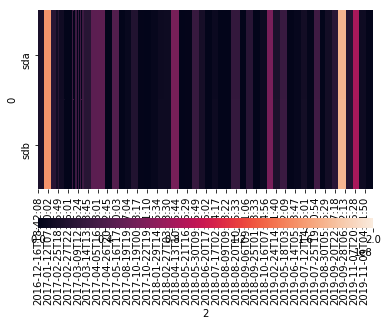

In [165]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap( final_df_a, vmin=0, vmax=200000000, ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"} )